In [1]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins

In [2]:
sd_benchmarks = {}
for name in ["literature_sd","literature_det","random_sd","random_det"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    sd_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

In [3]:
tool_set = ["yes.seminator#def","yes.owl#best", "no.owl#best"]

For each benchmark, we list the cumulative numbers of states for each tool. `yes` in the name of tools means that the Spot simplifications were applied on the results of the tools (were not disabled for `seminator`). `best` means that we choose the best variant for Owl, `#def` is the default setting of Seminator 2. If you want to see numbers where Spot's simplifications were not run for Owl, or the numbers without the _best-for-Owl_ approach, set tool_set to `None`. If you do, the `#a` stands for `ltl2ldgba -a` and analogously for `#s`.

In [4]:
gather_cumulative(sd_benchmarks, tool_set=tool_set)

,literature_sd,literature_det,random_sd,random_det
tool,,,,
no.owl#best,306,786,3497,2838
yes.owl#best,272,706,3005,2528
yes.seminator#def,207,580,2562,2385


### Minimal automata

The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in min hits shows how many times the same size as the smallest automaton was achieved. The number in unique min hits counts only cases where the given tool is the only tool with such a small automaton.

In [5]:
gather_mins(sd_benchmarks, tool_set=tool_set)

### Running times and timeouts
The `#a` variant of Owl reached the 30s timeout in one case for random formulae. Otherwise, most of the execution times were below 1s for all tools.

In [6]:
for name, b in sd_benchmarks.items():
    print(name)
    display(b.get_error_counts())
    display(b.values.time.max())

literature_sd


,timeout,parse error,incorrect,crash,no output
no.owl#a,1,0,0,0,0
yes.owl#a,1,0,0,0,0


tool
min(count)             0.034766
no.owl#a              30.000400
no.owl#best            0.917197
no.owl#s               0.917197
no.seminator#def       0.055873
no.seminator#sba       0.065737
no.seminator#tba       0.067963
no.seminator#tgba      0.057469
no.seminator-1-1       0.065787
no.seminator-1-2       0.059503
yes.owl#a             30.000500
yes.owl#best           1.752060
yes.owl#s              1.752060
yes.seminator#def      0.073693
yes.seminator#sba      0.074375
yes.seminator#tba      0.092564
yes.seminator#tgba     0.105345
yes.seminator-1-1      0.114068
yes.seminator-1-2      0.118711
dtype: float64

literature_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.100263
no.owl#a              7.737870
no.owl#best           0.168941
no.owl#s              0.714064
no.seminator#def      0.059072
no.seminator#sba      0.059362
no.seminator#tba      0.054489
no.seminator#tgba     0.069948
no.seminator-1-1      0.063631
no.seminator-1-2      0.070395
yes.owl#a             9.751100
yes.owl#best          1.659090
yes.owl#s             2.904100
yes.seminator#def     0.100263
yes.seminator#sba     0.085377
yes.seminator#tba     0.076929
yes.seminator#tgba    0.069277
yes.seminator-1-1     0.099011
yes.seminator-1-2     0.108549
dtype: float64

random_sd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.093089
no.owl#a              0.246978
no.owl#best           0.165076
no.owl#s              0.183502
no.seminator#def      0.099493
no.seminator#sba      0.069226
no.seminator#tba      0.076668
no.seminator#tgba     0.071572
no.seminator-1-1      0.088676
no.seminator-1-2      0.101028
yes.owl#a             0.392236
yes.owl#best          0.240683
yes.owl#s             0.240683
yes.seminator#def     0.102088
yes.seminator#sba     0.086770
yes.seminator#tba     0.084375
yes.seminator#tgba    0.100318
yes.seminator-1-1     0.088595
yes.seminator-1-2     0.129836
dtype: float64

random_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)            0.052428
no.owl#a              0.052428
no.owl#best           0.052428
no.owl#s              0.070573
no.seminator#def      0.072205
no.seminator#sba      0.077062
no.seminator#tba      0.081474
no.seminator#tgba     0.088180
no.seminator-1-1      0.074690
no.seminator-1-2      0.074745
yes.owl#a             0.118696
yes.owl#best          0.118696
yes.owl#s             0.131304
yes.seminator#def     0.070684
yes.seminator#sba     0.073177
yes.seminator#tba     0.081507
yes.seminator#tgba    0.074737
yes.seminator-1-1     0.079481
yes.seminator-1-2     0.098182
dtype: float64

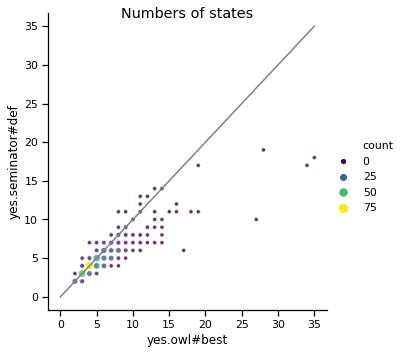

In [7]:
b = sd_benchmarks["random_sd"]
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

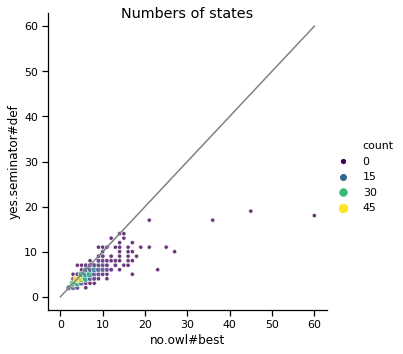

In [8]:
b = sd_benchmarks["random_sd"]
b.seaborn_scatter_plot("no.owl#best","yes.seminator#def", include_equal=True)

### Cross-comparison
The cross-comparison for a benchmark shows, in a cell (`row`,`column`) in how many cases the tool in `row` produces automaton that is better thatn the one produced by `column`. The last columns (`V`) summs the numbers across rows, while the green highlighting fill a space that is proportional to how well the tool in `row` competed agains `column` (proportional across columns).

In [9]:
for n, b in sd_benchmarks.items():
    print(n)
    display(b.cross_compare(tool_set=tool_set))

literature_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,40,72
yes.owl#best,2,nan,38,40
no.owl#best,2,0,nan,2


literature_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,66,98
yes.owl#best,0,nan,66,66
no.owl#best,0,0,nan,0


random_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,250,402,652
yes.owl#best,135,nan,423,558
no.owl#best,67,0,nan,67


random_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,53,197,250
yes.owl#best,4,nan,195,199
no.owl#best,0,0,nan,0


# Merged results
We now merge the random results from the 2 categories into 1

In [10]:
!cp data/random_det.csv data/random_sd_merged.csv
!tail -n +2 data/random_sd.csv >> data/random_sd_merged.csv
!wc data/random_sd_merged.csv
!cp data/literature_det.csv data/literature_sd_merged.csv
!tail -n +2 data/literature_sd.csv >> data/literature_sd_merged.csv
!wc data/literature_sd_merged.csv

  16001 1224283 7507123 data/random_sd_merged.csv
   3217  309869 1935768 data/literature_sd_merged.csv


In [11]:
m_benchmarks = {}
for name in ["literature_sd_merged","random_sd_merged"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    m_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

In [12]:
gather_cumulative(m_benchmarks, tool_set=tool_set)

,literature_sd_merged,random_sd_merged
tool,,
no.owl#best,1092,6335
yes.owl#best,978,5533
yes.seminator#def,787,4947


In [13]:
gather_mins(m_benchmarks, tool_set=tool_set)

In [14]:
b = m_benchmarks["random_sd_merged"]

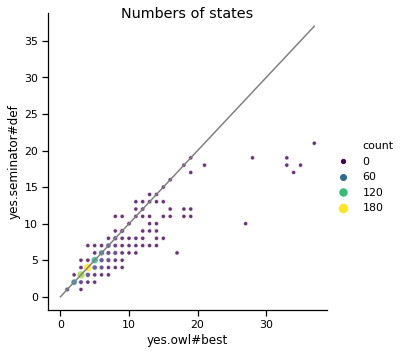

In [15]:
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

In [16]:
b.cross_compare(tool_set)

,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,303,599,902
yes.owl#best,139,nan,618,757
no.owl#best,67,0,nan,67
